In [1]:
import pandas as pd

Import data

In [51]:
data = pd.read_csv('data/Pokemon.csv')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Show Data on graph

<Axes: xlabel='Type 1', ylabel='Count'>

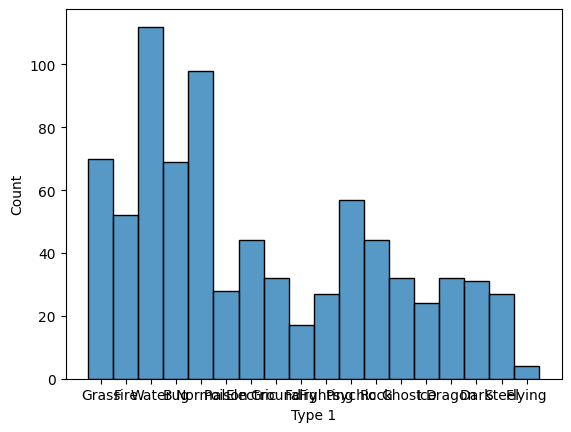

In [5]:
import seaborn as sns

sns.histplot(data, x='Type 1')

Get pokemon with type grass and HP > 40

In [23]:
data[(data['Type 1'] == 'Grass') & (data.HP > 100)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
652,591,Amoonguss,Grass,Poison,464,114,85,70,85,80,30,5,False
741,673,Gogoat,Grass,NaN,531,123,100,62,97,81,68,6,False


Display second type count


In [29]:
data['Type 2'].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

Display for each  generation median Attack

In [ ]:
data.groupby(['Generation'])['Sp. Atk'].mean().plot()

Gen with most legendary


In [ ]:
data[(data.Legendary == True)].groupby(['Generation'])['Legendary'].value_counts().plot()

Types mapping


In [45]:
type_mapping = {
  "Flying" : 0,
  "Ground" : 1,
  "Poison" : 2,
  "Psychic" : 3,
  "Fighting" : 4,
  "Grass" : 5,
  "Fairy" : 6,
  "Steel" : 7,
  "Dark" : 8,
  "Dragon" : 9,
  "Water" : 10,
  "Ghost" : 11,
  "Ice" : 12,
  "Rock" : 13,
  "Fire" : 14,
  "Electric" : 15,
  "Normal" : 16,
  "Bug" : 17,
  "NaN" : 18 
}

Preprocess data

In [52]:
def applyOnNaN(x):
    if pd.isna(x):
        return -1
    else:
        return type_mapping[x]

#Transform string into number
data['Legendary'] = data['Legendary'].map({True: 1, False: 0})
data['Type 1'] = data['Type 1'].map(lambda x: applyOnNaN(x))
data['Type 2'] = data['Type 2'].map(lambda x: applyOnNaN(x))

data = data.drop(columns=['#', 'Name'])
data


,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,5,2,318,45,49,49,65,65,45,1,0
1,5,2,405,60,62,63,80,80,60,1,0
2,5,2,525,80,82,83,100,100,80,1,0
3,5,2,625,80,100,123,122,120,80,1,0
4,14,-1,309,39,52,43,60,50,65,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,13,6,600,50,100,150,100,150,50,6,1
796,13,6,700,50,160,110,160,110,110,6,1
797,3,11,600,80,110,60,150,130,70,6,1
798,3,8,680,80,160,60,170,130,80,6,1


Training test

In [75]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = data.drop(columns=['HP'])
y = data['HP']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train the model

In [76]:
# Initialize the model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Evaluate the model


In [77]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 254.08091437500008


Test modal

In [79]:
new_pokemon = pd.DataFrame({
    'Type 1': [1],  # Grass
    'Type 2': [2],  # Poison
    'Total': [325],
    'Attack': [50],
    'Defense': [50],
    'Sp. Atk': [65],
    'Sp. Def': [65],
    'Speed': [45],
    'Generation': [1],
    'Legendary': [0]
})

# Predict the 'Total' stat
new_pokemon_total = model.predict(new_pokemon)
print(f'Predicted Total stat for new Pokémon: {new_pokemon_total[0]}')

Predicted Total stat for new Pokémon: 52.66
